In [29]:
# Minhaz
# Assignment on Classification 20240509
# Data set - Iris

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
data = pd.read_excel (r"C:\Users\mamin\Downloads\iris.xls")

In [32]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [35]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [36]:
data.shape

(150, 5)

In [37]:
# Preprocessing steps - find null values, fixing, outlier detection & handling

In [38]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [39]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

<Axes: xlabel='Classification'>

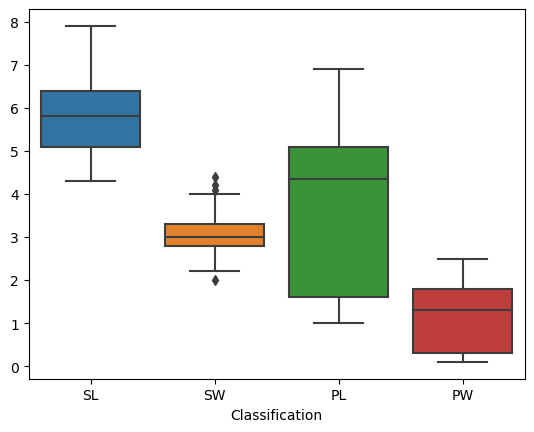

In [40]:
plt.xlabel('Classification') 
sns.boxplot(data)
#sns.boxplot(x = data['Classification'])

<Axes: xlabel='SW'>

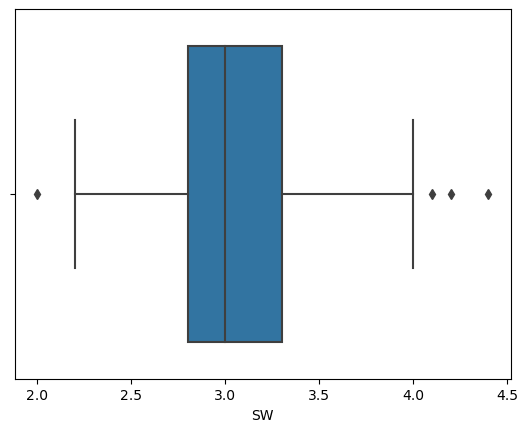

In [41]:
#outlier detection for 'SW'
sns.boxplot(x = data['SW'])

In [43]:
q1 = data['SW'].quantile(0.25)
q3 = data['SW'].quantile(0.75)
iqr = q3 - q1
iqr

0.5

In [44]:
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
print(upper_limit)
print(lower_limit)

4.05
2.05


In [45]:
def limit_imputer(value):
    if value>upper_limit:
        return upper_limit
    if value<lower_limit:
        return lower_limit
    else:
        return value

In [47]:
# applying the imputer function
data['SW'] = data['SW'].apply(limit_imputer)

In [49]:
data['SW'].describe()

count    144.000000
mean       3.045833
std        0.419519
min        2.050000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.050000
Name: SW, dtype: float64

<Axes: xlabel='SW'>

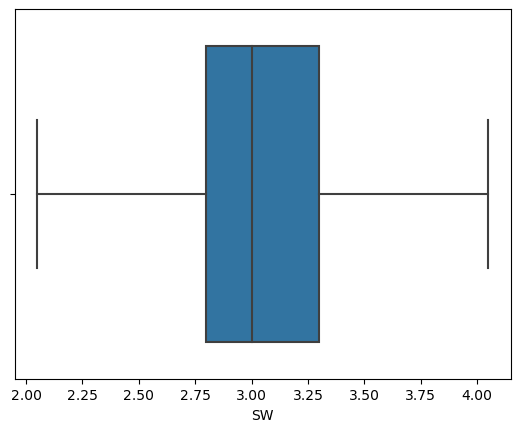

In [51]:
sns.boxplot(x = data['SW'])

In [53]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [ ]:
# Detectecting and treaing null values of numerical columns

In [54]:
num_columns = ['SL','SW','PL']

In [55]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
data[num_columns] = imputer.fit_transform(data[num_columns])

In [56]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [57]:
# Classification

In [58]:
y=data['Classification']
X = data.drop(['Classification'],axis=1)

In [61]:
X.shape

(150, 4)

In [62]:
y.shape

(150,)

In [64]:
y = np.array(y)
y=y.reshape(-1,1)
y.shape

(150, 1)

In [65]:
from sklearn.preprocessing import LabelEncoder

# Encode the labels
le = LabelEncoder()
y = le.fit_transform(y)

# Reshape y to a 2D array
y = y.reshape(-1, 1)

# Apply the StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

C:\Users\mamin\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
# Spliting into Train and Test

In [67]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test =train_test_split(X,y,random_state=42,test_size=0.20)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(120, 4) (30, 4) (120, 1) (30, 1)


In [68]:
# Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression
ln_model = LinearRegression()
ln_model.fit(X_train,y_train)
y_predictions = ln_model.predict(X_test)

In [70]:
from sklearn.metrics import mean_squared_error , mean_absolute_error,r2_score
print("Mean Squared Error of the model is ",mean_squared_error(y_predictions,y_test))
print("Mean absolute Error of the model is ",mean_absolute_error(y_predictions,y_test))
print("R2 score of the model is ",r2_score(y_predictions,y_test))

Mean Squared Error of the model is  0.05406022280311538
Mean absolute Error of the model is  0.17210513130464944
R2 score of the model is  0.9474712933984257


In [71]:
# Logistic Regression

In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_cat = le.fit_transform(y_train)
y_test_cat = le.transform(y_test)

C:\Users\mamin\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mamin\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [74]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train_cat)
y_pred = log.predict(X_test)

In [75]:
from sklearn.metrics import confusion_matrix , accuracy_score ,precision_score , recall_score,f1_score
print('Accuracy is', accuracy_score(y_test_cat, y_pred))
print('Recall is', recall_score(y_test_cat, y_pred,average='macro'))
print('F1 Score is', f1_score(y_test_cat, y_pred,average ='macro'))

Accuracy is 0.9666666666666667
Recall is 0.9629629629629629
F1 Score is 0.9658994032395567


In [76]:
# SVM

In [77]:
from sklearn.svm import SVC
svm_s = SVC(kernel ='linear')
svm_s.fit(X_train, y_train_cat)
y_svm_pred = svm_s.predict(X_test)

In [78]:
confusion_matrix(y_test_cat,y_svm_pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [79]:
print('Accuracy is', accuracy_score(y_test_cat, y_svm_pred))
print('Precision is', precision_score(y_test_cat, y_svm_pred, average='macro'))

Accuracy is 0.9666666666666667
Precision is 0.9722222222222222


In [82]:
svm_s = SVC(kernel ='poly')
svm_s.fit(X_train, y_train_cat)
y_svm_pred = svm_s.predict(X_test)
print('Accuracy is', accuracy_score(y_test_cat, y_svm_pred))

Accuracy is 0.9333333333333333


In [83]:
svm_s = SVC(kernel ='rbf')
svm_s.fit(X_train, y_train_cat)
y_svm_pred = svm_s.predict(X_test)
print('Accuracy is', accuracy_score(y_test_cat, y_svm_pred))

Accuracy is 0.9666666666666667


In [84]:
# Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier
ds =  DecisionTreeClassifier(criterion='entropy')
ds.fit(X_train, y_train_cat)
ds_pred=ds.predict(X_test)
print('Accuracy is', accuracy_score(y_test_cat, ds_pred))

Accuracy is 1.0


In [86]:
confusion_matrix(y_test_cat,ds_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [87]:
# Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
rtf =  RandomForestClassifier()
rtf.fit(X_train, y_train_cat)
rtf_pred=rtf.predict(X_test)
print('Accuracy is', accuracy_score(y_test_cat, rtf_pred))

Accuracy is 1.0


In [89]:
confusion_matrix(y_test_cat,rtf_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [90]:
# KNN

In [91]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    classifier.fit(X_train,y_train_cat)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test_cat,y_pred)
    metric_k.append(acc)
metric_k

[1.0,
 1.0,
 0.9666666666666667,
 1.0,
 0.9666666666666667,
 1.0,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9666666666666667]

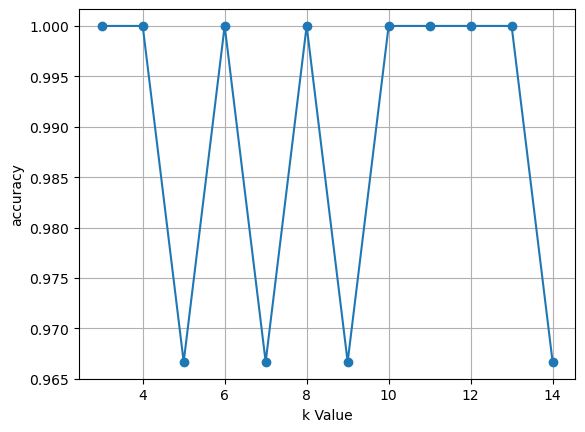

In [92]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.grid()

In [93]:
classifier = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
classifier.fit(X_train,y_train_cat)
y_pred_knn = classifier.predict(X_test)
print('Accuracy is', accuracy_score(y_test_cat, y_pred_knn))

Accuracy is 1.0


In [94]:
# All above algorithms shows accuracy of "1.0"